In [1]:
# Here we will do time-series forecasting to predict the monthly sales in January 2016, by first analyzing the monthly
# sales in the years 2013, 2014 and 2015.

# Check the project workspace and set paths for folders.

import os
os.chdir('G:\Customer Analytics in Large Organisations\Assignment 1')
path1 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2013'
path2 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2014'
path3 = r'G:\Customer Analytics in Large Organisations\Assignment 1\2015'
os.chdir('G:\Customer Analytics in Large Organisations\Assignment 1')
print("Project Workspace:", os.getcwd())
print()

# Import all necessary packages for this part.

import pandas as pd
import numpy as np
import statistics as myStats
import glob as glob
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
import statsmodels.api as myStatsModel
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
rcParams['text.color'] = 'k'
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Remove scientific notation to expand numbers in the dataset up to the second decimal place.

pd.set_option('display.float_format', lambda x: '%.4f' % x)

Project Workspace: G:\Customer Analytics in Large Organisations\Assignment 1



In [2]:
# From the "Sale Date" data column, extract day, month and date columns for each transaction.

def fetchMonthAndYearColumns(dataFile):
    dataFile["Day"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[2])
    dataFile["Month"] = dataFile["Sale_Date"].apply(lambda month: month.split("-")[1])
    dataFile["Year"] = dataFile["Sale_Date"].apply(lambda year: year.split("-")[0])
    dataFile.drop(columns = ["Sale_Date"])
    return dataFile

In [3]:
# Aggregating "Item Value" (sum) and renaming it to "Total Sales".

def aggregateDates(dataFile):
    dataFile["Sale_Date"] = pd.to_datetime(dataFile["Sale_Date"])
    dataFile = dataFile.groupby(by = ["Sale_Date"], as_index = False).agg({"Item_Value": "sum"}).rename(columns = {"Item_Value": "Total_Sales"})
    return dataFile

In [4]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate1()" for year 2013.

def importAndCollate1():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path1 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2013DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2013DataFile.shape)
    return year2013DataFile

In [5]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate2()" for year 2014.

def importAndCollate2():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path2 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2014DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2014DataFile.shape)
    return year2014DataFile

In [6]:
# Import data for each day and collate the data. For this, we create a function "importAndCollate3()" for year 2015.

def importAndCollate3():
    dataFileList = []
    fileNames = [fileName for fileName in glob.glob(path3 + "/*.csv", recursive = True)]
    for fileName in fileNames:
        dataFileList.append(pd.read_csv(fileName))
    year2015DataFile = pd.concat(dataFileList, ignore_index = False)
    print("Size of Dataset:", year2015DataFile.shape)
    return year2015DataFile

In [7]:
# Import all data for year 2013 and collate it in one dataframe.

year2013DataFile = importAndCollate1()

Size of Dataset: (12526008, 14)


In [8]:
# Import all data for year 2014 and collate it in one dataframe.

year2014DataFile = importAndCollate2()

Size of Dataset: (12560113, 14)


In [9]:
# Import all data for year 2015 and collate it in one dataframe.

year2015DataFile = importAndCollate3()

Size of Dataset: (12285455, 14)


In [10]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df1 for the year 2013 file.

#year2013DataFile = year2013DataFile.dropna(subset=['UniSA_Customer_No'])
df1 = pd.DataFrame(data=year2013DataFile)
df1['UniSA_Customer_No'] = ['%.12g' % n for n in df1['UniSA_Customer_No']]
#del df1['Sale_Time']
#del df1['UniSA_Receipt_No1']
del df1['Receipt_Line_No']
del df1['Total_Receipt_Lines']
del df1['Barcode_Item']
#del df1['Item_Description']
del df1['Department_Name']
del df1['Commodity_Name']
del df1['Offer']
del df1['Total_Sale_Amount_InclusiveGST']
del df1['Quantity_Sold']
#df1

In [11]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df2 for the year 2014 file.

#year2014DataFile = year2014DataFile.dropna(subset=['UniSA_Customer_No'])
df2 = pd.DataFrame(data=year2014DataFile)
df2['UniSA_Customer_No'] = ['%.12g' % n for n in df2['UniSA_Customer_No']]
#del df2['Sale_Time']
#del df2['UniSA_Receipt_No1']
del df2['Receipt_Line_No']
del df2['Total_Receipt_Lines']
del df2['Barcode_Item']
#del df2['Item_Description']
del df2['Department_Name']
del df2['Commodity_Name']
del df2['Offer']
del df2['Total_Sale_Amount_InclusiveGST']
del df2['Quantity_Sold']
#df2

In [12]:
# Remove "NA" from "UniSA_Customer_No" and delete unnessary columns and values into a new data frame df3 for the year 2015 file.

#year2015DataFile = year2015DataFile.dropna(subset=['UniSA_Customer_No'])
df3 = pd.DataFrame(data=year2015DataFile)
df3['UniSA_Customer_No'] = ['%.12g' % n for n in df3['UniSA_Customer_No']]
#del df3['Sale_Time']
#del df3['UniSA_Receipt_No1']
del df3['Receipt_Line_No']
del df3['Total_Receipt_Lines']
del df3['Barcode_Item']
#del df3['Item_Description']
del df3['Department_Name']
del df3['Commodity_Name']
del df3['Offer']
del df3['Total_Sale_Amount_InclusiveGST']
del df3['Quantity_Sold']
#df3

In [13]:
# Fetch Month and Year

df1 = fetchMonthAndYearColumns(df1)
#df1

In [14]:
# Fetch Month and Year

df2 = fetchMonthAndYearColumns(df2)
#df2

In [15]:
# Fetch Month and Year

df3 = fetchMonthAndYearColumns(df3)
#df3

In [16]:
# Appending df1 and df2 into a new dataframe "sample".

sample = df1.append(df2, ignore_index=True)
#sample

In [17]:
# Appending sample and df3 into a new dataframe "final".

final = sample.append(df3, ignore_index=True)
#final

In [18]:
#x = final.dropna(subset=['Item_Description'])

In [19]:
#(x['Item_Description']).nunique()

In [20]:
#y = final
#(y['Item_Value']).sum()

In [21]:
yearDataFile = final

#yearDataFile = fetchMonthAndYearColumns(yearDataFile)

In [22]:
# First aggregate over a day.

# yearDataFile['ReceiptID'] = yearDataFile['UniSA_Receipt_No1']


#aggregations1 = {
   #"Quantity_Sold": "sum",
#   "Item_Value": "sum",
   #"UniSA_Receipt_No1": pd.Series.nunique
#GroupDay = yearDataFile.groupby(by = ["Day", "Month", "Year"], as_index = False).agg(aggregations1).rename(columns = {"Item_Value": "Total_Sale_Amount"})
#GroupDay

In [23]:
# First aggregate over a day.

#aggregations2 = {
   #"Quantity_Sold": "sum",
#   "Total_Sale_Amount": "sum",
   #"UniSA_Receipt_No1": pd.Series.nunique
#}

#GroupMonth = GroupDay.groupby(by = ["Month", "Year"], as_index = False).agg(aggregations2).rename(columns = {"Total_Sale_Amount": "Total_Sales"})
#GroupMonth

In [24]:
#GroupMonth = GroupMonth.sort_values(['Year','Month'],ascending=[True, True]).reset_index()
#del GroupMonth['index']
#del GroupMonth['level_0']
#GroupMonth

In [25]:
# Aggregate the data over each month to extract the total sales amount for each day.

aggregatedData = aggregateDates(yearDataFile)
aggregatedData["Sale_Date"] = pd.to_datetime(aggregatedData["Sale_Date"])
aggregatedData = aggregatedData.set_index('Sale_Date')
aggregatedData = aggregatedData.resample("MS").sum()
aggregatedData

,Total_Sales
Sale_Date,
2013-01-01,4088740.0200
2013-02-01,3884429.3000
2013-03-01,4430223.4200
2013-04-01,3970568.0000
2013-05-01,4126836.6300
2013-06-01,3915480.4500
2013-07-01,3994278.1600
2013-08-01,4223293.9000
2013-09-01,3967550.5200


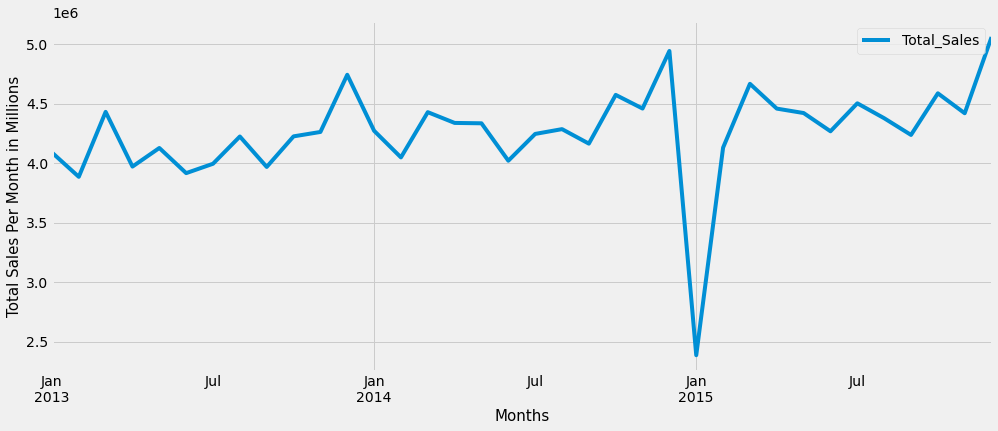

In [26]:
# Visualize the time series data of Total Sales.

aggregatedData.plot(figsize = (15, 6))
plt.xlabel("Months" ,fontsize=15)
plt.ylabel("Total Sales Per Month in Millions" ,fontsize=15)
plt.show()

In [28]:
# Impute the Total_Sales of 2015-01-01 by the value calculated below.
# 17 Days = 2385097.0600
# 1 Day = 2385097.0600 / 17 = 140299.8270
# 30 Days = 140299.8270 * 30 = 4208994.8100

ComputedValue = 4208994.8100
aggregatedData = aggregatedData.reset_index()
aggregatedData["Total_Sales"][aggregatedData["Sale_Date"] == '2015-01-01'] = ComputedValue
aggregatedData = aggregatedData.set_index('Sale_Date')
#del aggregatedData['index']
aggregatedData

,Total_Sales
Sale_Date,
2013-01-01,4088740.0200
2013-02-01,3884429.3000
2013-03-01,4430223.4200
2013-04-01,3970568.0000
2013-05-01,4126836.6300
2013-06-01,3915480.4500
2013-07-01,3994278.1600
2013-08-01,4223293.9000
2013-09-01,3967550.5200


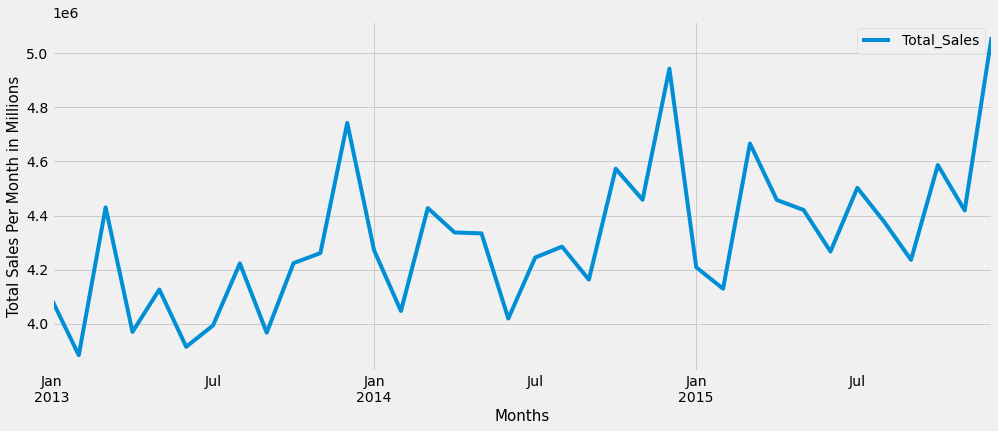

In [29]:
# Visualize the time series data of Total Sales after imputation.

figure = aggregatedData.plot(figsize = (15, 6))
plt.xlabel("Months" ,fontsize=15)
plt.ylabel("Total Sales Per Month in Millions" ,fontsize=15)
plt.show()

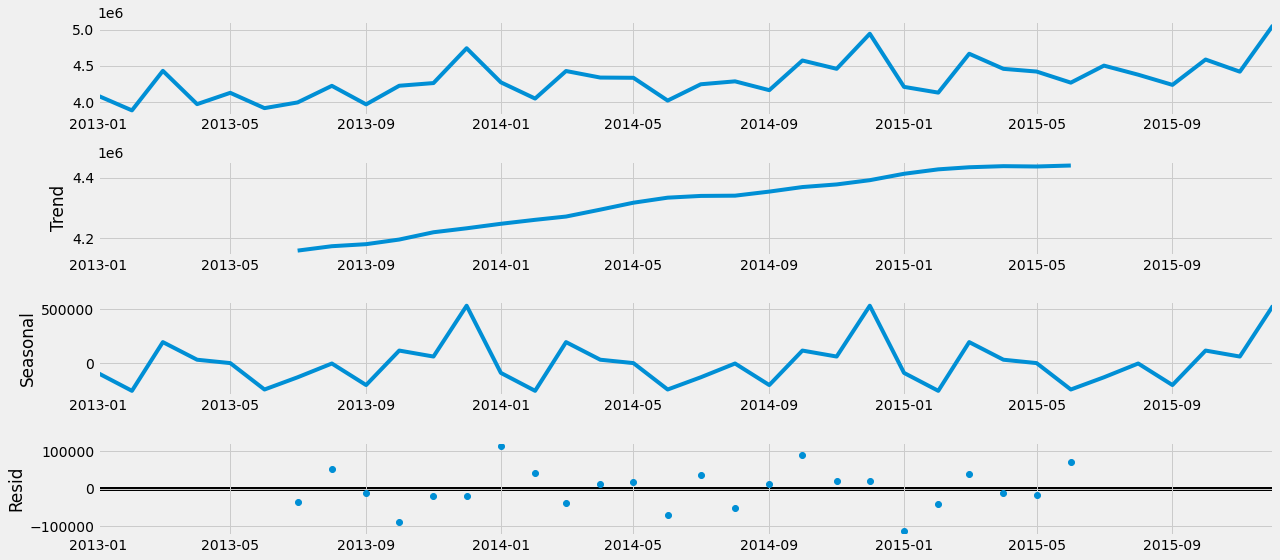

In [30]:
# We need to check the trend, seasonality, and noise in the data.

decomposition = myStatsModel.tsa.seasonal_decompose(aggregatedData, model = "additive")
fig = decomposition.plot()
plt.show()

In [31]:
# Dickey-Fuller Test for Stationarity

dftest = adfuller(aggregatedData["Total_Sales"], autolag = "AIC")
dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print(dfoutput)
print()

# KPSS Test for Stationarity

kpsstest = kpss(aggregatedData["Total_Sales"], regression='c')
kpss_output = pd.Series(kpsstest[0:3], index = ["Test Statistic", "p-value", "Lags Used"])
for key,value in kpsstest[3].items():
    kpss_output["Critical Value (%s)"%key] = value
print (kpss_output)
print()

Test Statistic                -4.0149
p-value                        0.0013
#Lags Used                     0.0000
Number of Observations Used   35.0000
Critical Value (1%)           -3.6327
Critical Value (5%)           -2.9485
Critical Value (10%)          -2.6130
dtype: float64

Test Statistic           0.4795
p-value                  0.0463
Lags Used               10.0000
Critical Value (10%)     0.3470
Critical Value (5%)      0.4630
Critical Value (2.5%)    0.5740
Critical Value (1%)      0.7390
dtype: float64



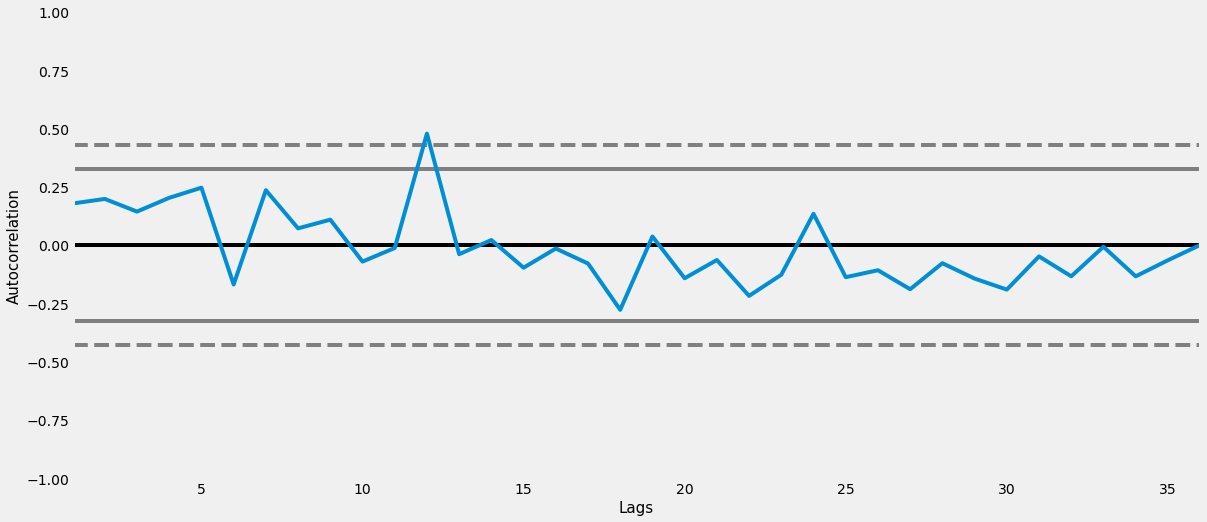

In [32]:
# Autocorrelation Plot

from pandas.plotting import autocorrelation_plot 
import matplotlib.pyplot as plt
autocorrelation_plot(aggregatedData)
plt.xlabel("Lags" ,fontsize=15)
plt.ylabel("Autocorrelation" ,fontsize=15)
plt.show()

In [35]:
# We can see that the sales follow an upward trend, and are seasonal.
# Knowing this, we carry out time series forecasting using ARIMA, (Auto-Regressive Integrated Moving Average).
# ARIMA models are denoted with the notation ARIMA(p, d, q). These three
# parameters account for seasonality, trend, and noise in data.

p = d = q = range(1, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = myStatsModel.tsa.statespace.SARIMAX(aggregatedData,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit(disp = True)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:242.6979118524186
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 1, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 2, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 2, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 2, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 3, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 3, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 3, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 3, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(1, 4, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 4, 2, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(1, 4, 3, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(1, 4, 4, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 1, 4, 12)12 - AIC:18.0
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 1, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 1, 1)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 1, 1)x(2, 2,

ARIMA(1, 1, 4)x(1, 1, 4, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 4)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(1, 2, 4, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 4)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(1, 3, 4, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(1, 4, 1, 12)12 - AIC:16.0
ARIMA(1, 1, 4)x(1, 4, 2, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(1, 4, 3, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(1, 4, 4, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(2, 1, 1, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(2, 1, 4, 12)12 - AIC:24.0
ARIMA(1, 1, 4)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(2, 2, 3, 12)12 - AIC:22.0
ARIMA(1, 1, 4)x(2, 2, 4, 12)12 - AIC:24.0
ARIMA(1, 1, 4)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(1, 1, 4)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(1, 1, 4)x(2, 3, 3, 12)12 - A

ARIMA(1, 2, 3)x(1, 2, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 2, 4, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(1, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(1, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 3, 4, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(1, 4, 1, 12)12 - AIC:14.0
ARIMA(1, 2, 3)x(1, 4, 2, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(1, 4, 3, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(1, 4, 4, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 1, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 1, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 1, 3, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 1, 4, 12)12 - AIC:22.0
ARIMA(1, 2, 3)x(2, 2, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 2, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 2, 3, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 2, 4, 12)12 - AIC:22.0
ARIMA(1, 2, 3)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(1, 2, 3)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(1, 2, 3)x(2, 3, 4, 12)12 - AIC:22.0
ARIMA(1, 2, 3)x(2, 4, 1, 12)12 - AIC:16.0
ARIMA(1, 2, 3)x(2, 4, 2, 12)12 - A

ARIMA(1, 3, 2)x(1, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(1, 3, 4, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(1, 4, 1, 12)12 - AIC:12.0
ARIMA(1, 3, 2)x(1, 4, 2, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(1, 4, 3, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(1, 4, 4, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 1, 4, 12)12 - AIC:20.0
ARIMA(1, 3, 2)x(2, 2, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 2, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 2, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 2, 4, 12)12 - AIC:20.0
ARIMA(1, 3, 2)x(2, 3, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 3, 4, 12)12 - AIC:20.0
ARIMA(1, 3, 2)x(2, 4, 1, 12)12 - AIC:14.0
ARIMA(1, 3, 2)x(2, 4, 2, 12)12 - AIC:16.0
ARIMA(1, 3, 2)x(2, 4, 3, 12)12 - AIC:18.0
ARIMA(1, 3, 2)x(2, 4, 4, 12)12 - AIC:20.0
ARIMA(1, 3, 2)x(3, 1, 1, 12)12 - A

ARIMA(1, 4, 1)x(1, 4, 2, 12)12 - AIC:12.0
ARIMA(1, 4, 1)x(1, 4, 3, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(1, 4, 4, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(2, 1, 1, 12)12 - AIC:12.0
ARIMA(1, 4, 1)x(2, 1, 2, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(2, 1, 3, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(2, 1, 4, 12)12 - AIC:18.0
ARIMA(1, 4, 1)x(2, 2, 1, 12)12 - AIC:12.0
ARIMA(1, 4, 1)x(2, 2, 2, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(2, 2, 3, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(2, 2, 4, 12)12 - AIC:18.0
ARIMA(1, 4, 1)x(2, 3, 1, 12)12 - AIC:12.0
ARIMA(1, 4, 1)x(2, 3, 2, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(2, 3, 3, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(2, 3, 4, 12)12 - AIC:18.0
ARIMA(1, 4, 1)x(2, 4, 1, 12)12 - AIC:12.0
ARIMA(1, 4, 1)x(2, 4, 2, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(2, 4, 3, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(2, 4, 4, 12)12 - AIC:18.0
ARIMA(1, 4, 1)x(3, 1, 1, 12)12 - AIC:14.0
ARIMA(1, 4, 1)x(3, 1, 2, 12)12 - AIC:16.0
ARIMA(1, 4, 1)x(3, 1, 3, 12)12 - AIC:18.0
ARIMA(1, 4, 1)x(3, 1, 4, 12)12 - AIC:20.0
ARIMA(1, 4, 1)x(3, 2, 1, 12)12 - A

ARIMA(1, 4, 4)x(2, 1, 2, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(2, 1, 3, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(2, 1, 4, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(1, 4, 4)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(2, 2, 3, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(2, 2, 4, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(1, 4, 4)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(2, 3, 3, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(2, 3, 4, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(2, 4, 1, 12)12 - AIC:18.0
ARIMA(1, 4, 4)x(2, 4, 2, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(2, 4, 3, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(2, 4, 4, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(3, 1, 1, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(3, 1, 2, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(3, 1, 3, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(3, 1, 4, 12)12 - AIC:26.0
ARIMA(1, 4, 4)x(3, 2, 1, 12)12 - AIC:20.0
ARIMA(1, 4, 4)x(3, 2, 2, 12)12 - AIC:22.0
ARIMA(1, 4, 4)x(3, 2, 3, 12)12 - AIC:24.0
ARIMA(1, 4, 4)x(3, 2, 4, 12)12 - AIC:26.0
ARIMA(1, 4, 4)x(3, 3, 1, 12)12 - A

ARIMA(2, 1, 3)x(2, 2, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 2, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 2, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(2, 2, 4, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(2, 3, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 3, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 3, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(2, 3, 4, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(2, 4, 1, 12)12 - AIC:18.0
ARIMA(2, 1, 3)x(2, 4, 2, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(2, 4, 3, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(2, 4, 4, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(3, 1, 4, 12)12 - AIC:26.0
ARIMA(2, 1, 3)x(3, 2, 1, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(3, 2, 2, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(3, 2, 3, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(3, 2, 4, 12)12 - AIC:26.0
ARIMA(2, 1, 3)x(3, 3, 1, 12)12 - AIC:20.0
ARIMA(2, 1, 3)x(3, 3, 2, 12)12 - AIC:22.0
ARIMA(2, 1, 3)x(3, 3, 3, 12)12 - AIC:24.0
ARIMA(2, 1, 3)x(3, 3, 4, 12)12 - A

ARIMA(2, 2, 2)x(2, 2, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(2, 2, 4, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(2, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(2, 3, 4, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(2, 4, 1, 12)12 - AIC:16.0
ARIMA(2, 2, 2)x(2, 4, 2, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(2, 4, 3, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(2, 4, 4, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(3, 1, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(3, 1, 2, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(3, 1, 3, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(3, 1, 4, 12)12 - AIC:24.0
ARIMA(2, 2, 2)x(3, 2, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(3, 2, 2, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(3, 2, 3, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(3, 2, 4, 12)12 - AIC:24.0
ARIMA(2, 2, 2)x(3, 3, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(3, 3, 2, 12)12 - AIC:20.0
ARIMA(2, 2, 2)x(3, 3, 3, 12)12 - AIC:22.0
ARIMA(2, 2, 2)x(3, 3, 4, 12)12 - AIC:24.0
ARIMA(2, 2, 2)x(3, 4, 1, 12)12 - AIC:18.0
ARIMA(2, 2, 2)x(3, 4, 2, 12)12 - A

ARIMA(2, 3, 1)x(2, 3, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(2, 3, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(2, 3, 4, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(2, 4, 1, 12)12 - AIC:14.0
ARIMA(2, 3, 1)x(2, 4, 2, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(2, 4, 3, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(2, 4, 4, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(3, 1, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(3, 1, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(3, 1, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(3, 1, 4, 12)12 - AIC:22.0
ARIMA(2, 3, 1)x(3, 2, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(3, 2, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(3, 2, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(3, 2, 4, 12)12 - AIC:22.0
ARIMA(2, 3, 1)x(3, 3, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(3, 3, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(3, 3, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(3, 3, 4, 12)12 - AIC:22.0
ARIMA(2, 3, 1)x(3, 4, 1, 12)12 - AIC:16.0
ARIMA(2, 3, 1)x(3, 4, 2, 12)12 - AIC:18.0
ARIMA(2, 3, 1)x(3, 4, 3, 12)12 - AIC:20.0
ARIMA(2, 3, 1)x(3, 4, 4, 12)12 - AIC:22.0
ARIMA(2, 3, 1)x(4, 1, 1, 12)12 - A

ARIMA(2, 3, 4)x(2, 4, 1, 12)12 - AIC:20.0
ARIMA(2, 3, 4)x(2, 4, 2, 12)12 - AIC:22.0
ARIMA(2, 3, 4)x(2, 4, 3, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(2, 4, 4, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(3, 1, 1, 12)12 - AIC:22.0
ARIMA(2, 3, 4)x(3, 1, 2, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(3, 1, 3, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(3, 1, 4, 12)12 - AIC:28.0
ARIMA(2, 3, 4)x(3, 2, 1, 12)12 - AIC:22.0
ARIMA(2, 3, 4)x(3, 2, 2, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(3, 2, 3, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(3, 2, 4, 12)12 - AIC:28.0
ARIMA(2, 3, 4)x(3, 3, 1, 12)12 - AIC:22.0
ARIMA(2, 3, 4)x(3, 3, 2, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(3, 3, 3, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(3, 3, 4, 12)12 - AIC:28.0
ARIMA(2, 3, 4)x(3, 4, 1, 12)12 - AIC:22.0
ARIMA(2, 3, 4)x(3, 4, 2, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(3, 4, 3, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(3, 4, 4, 12)12 - AIC:28.0
ARIMA(2, 3, 4)x(4, 1, 1, 12)12 - AIC:24.0
ARIMA(2, 3, 4)x(4, 1, 2, 12)12 - AIC:26.0
ARIMA(2, 3, 4)x(4, 1, 3, 12)12 - AIC:28.0
ARIMA(2, 3, 4)x(4, 1, 4, 12)12 - A

ARIMA(2, 4, 3)x(2, 4, 4, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(3, 1, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 3)x(3, 1, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(3, 1, 3, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(3, 1, 4, 12)12 - AIC:26.0
ARIMA(2, 4, 3)x(3, 2, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 3)x(3, 2, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(3, 2, 3, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(3, 2, 4, 12)12 - AIC:26.0
ARIMA(2, 4, 3)x(3, 3, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 3)x(3, 3, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(3, 3, 3, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(3, 3, 4, 12)12 - AIC:26.0
ARIMA(2, 4, 3)x(3, 4, 1, 12)12 - AIC:20.0
ARIMA(2, 4, 3)x(3, 4, 2, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(3, 4, 3, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(3, 4, 4, 12)12 - AIC:26.0
ARIMA(2, 4, 3)x(4, 1, 1, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(4, 1, 2, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(4, 1, 3, 12)12 - AIC:26.0
ARIMA(2, 4, 3)x(4, 1, 4, 12)12 - AIC:28.0
ARIMA(2, 4, 3)x(4, 2, 1, 12)12 - AIC:22.0
ARIMA(2, 4, 3)x(4, 2, 2, 12)12 - AIC:24.0
ARIMA(2, 4, 3)x(4, 2, 3, 12)12 - A

ARIMA(3, 1, 2)x(3, 1, 4, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(3, 2, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(3, 2, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(3, 2, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(3, 2, 4, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(3, 3, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(3, 3, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(3, 3, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(3, 3, 4, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(3, 4, 1, 12)12 - AIC:20.0
ARIMA(3, 1, 2)x(3, 4, 2, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(3, 4, 3, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(3, 4, 4, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(4, 1, 1, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(4, 1, 2, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(4, 1, 3, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(4, 1, 4, 12)12 - AIC:28.0
ARIMA(3, 1, 2)x(4, 2, 1, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(4, 2, 2, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(4, 2, 3, 12)12 - AIC:26.0
ARIMA(3, 1, 2)x(4, 2, 4, 12)12 - AIC:28.0
ARIMA(3, 1, 2)x(4, 3, 1, 12)12 - AIC:22.0
ARIMA(3, 1, 2)x(4, 3, 2, 12)12 - AIC:24.0
ARIMA(3, 1, 2)x(4, 3, 3, 12)12 - A

ARIMA(3, 2, 1)x(3, 2, 4, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(3, 3, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(3, 3, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(3, 3, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(3, 3, 4, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(3, 4, 1, 12)12 - AIC:18.0
ARIMA(3, 2, 1)x(3, 4, 2, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(3, 4, 3, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(3, 4, 4, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(4, 1, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(4, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(4, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(4, 1, 4, 12)12 - AIC:26.0
ARIMA(3, 2, 1)x(4, 2, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(4, 2, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(4, 2, 3, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(4, 2, 4, 12)12 - AIC:26.0
ARIMA(3, 2, 1)x(4, 3, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(4, 3, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(4, 3, 3, 12)12 - AIC:24.0
ARIMA(3, 2, 1)x(4, 3, 4, 12)12 - AIC:26.0
ARIMA(3, 2, 1)x(4, 4, 1, 12)12 - AIC:20.0
ARIMA(3, 2, 1)x(4, 4, 2, 12)12 - AIC:22.0
ARIMA(3, 2, 1)x(4, 4, 3, 12)12 - A

ARIMA(3, 2, 4)x(3, 3, 3, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(3, 3, 4, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(3, 4, 1, 12)12 - AIC:24.0
ARIMA(3, 2, 4)x(3, 4, 2, 12)12 - AIC:26.0
ARIMA(3, 2, 4)x(3, 4, 3, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(3, 4, 4, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(4, 1, 1, 12)12 - AIC:26.0
ARIMA(3, 2, 4)x(4, 1, 2, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(4, 1, 3, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(4, 1, 4, 12)12 - AIC:32.0
ARIMA(3, 2, 4)x(4, 2, 1, 12)12 - AIC:26.0
ARIMA(3, 2, 4)x(4, 2, 2, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(4, 2, 3, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(4, 2, 4, 12)12 - AIC:32.0
ARIMA(3, 2, 4)x(4, 3, 1, 12)12 - AIC:26.0
ARIMA(3, 2, 4)x(4, 3, 2, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(4, 3, 3, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(4, 3, 4, 12)12 - AIC:32.0
ARIMA(3, 2, 4)x(4, 4, 1, 12)12 - AIC:26.0
ARIMA(3, 2, 4)x(4, 4, 2, 12)12 - AIC:28.0
ARIMA(3, 2, 4)x(4, 4, 3, 12)12 - AIC:30.0
ARIMA(3, 2, 4)x(4, 4, 4, 12)12 - AIC:32.0
ARIMA(3, 3, 1)x(1, 1, 1, 12)12 - AIC:171.82548097462157
ARIMA(3, 3, 1)x(1, 1

ARIMA(3, 3, 3)x(3, 4, 2, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(3, 4, 3, 12)12 - AIC:26.0
ARIMA(3, 3, 3)x(3, 4, 4, 12)12 - AIC:28.0
ARIMA(3, 3, 3)x(4, 1, 1, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(4, 1, 2, 12)12 - AIC:26.0
ARIMA(3, 3, 3)x(4, 1, 3, 12)12 - AIC:28.0
ARIMA(3, 3, 3)x(4, 1, 4, 12)12 - AIC:30.0
ARIMA(3, 3, 3)x(4, 2, 1, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(4, 2, 2, 12)12 - AIC:26.0
ARIMA(3, 3, 3)x(4, 2, 3, 12)12 - AIC:28.0
ARIMA(3, 3, 3)x(4, 2, 4, 12)12 - AIC:30.0
ARIMA(3, 3, 3)x(4, 3, 1, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(4, 3, 2, 12)12 - AIC:26.0
ARIMA(3, 3, 3)x(4, 3, 3, 12)12 - AIC:28.0
ARIMA(3, 3, 3)x(4, 3, 4, 12)12 - AIC:30.0
ARIMA(3, 3, 3)x(4, 4, 1, 12)12 - AIC:24.0
ARIMA(3, 3, 3)x(4, 4, 2, 12)12 - AIC:26.0
ARIMA(3, 3, 3)x(4, 4, 3, 12)12 - AIC:28.0
ARIMA(3, 3, 3)x(4, 4, 4, 12)12 - AIC:30.0
ARIMA(3, 3, 4)x(1, 1, 1, 12)12 - AIC:110.2433003879101
ARIMA(3, 3, 4)x(1, 1, 2, 12)12 - AIC:22.0
ARIMA(3, 3, 4)x(1, 1, 3, 12)12 - AIC:24.0
ARIMA(3, 3, 4)x(1, 1, 4, 12)12 - AIC:26.0
ARIMA(3, 3, 4)x(1, 2,

ARIMA(3, 4, 2)x(4, 1, 1, 12)12 - AIC:22.0
ARIMA(3, 4, 2)x(4, 1, 2, 12)12 - AIC:24.0
ARIMA(3, 4, 2)x(4, 1, 3, 12)12 - AIC:26.0
ARIMA(3, 4, 2)x(4, 1, 4, 12)12 - AIC:28.0
ARIMA(3, 4, 2)x(4, 2, 1, 12)12 - AIC:22.0
ARIMA(3, 4, 2)x(4, 2, 2, 12)12 - AIC:24.0
ARIMA(3, 4, 2)x(4, 2, 3, 12)12 - AIC:26.0
ARIMA(3, 4, 2)x(4, 2, 4, 12)12 - AIC:28.0
ARIMA(3, 4, 2)x(4, 3, 1, 12)12 - AIC:22.0
ARIMA(3, 4, 2)x(4, 3, 2, 12)12 - AIC:24.0
ARIMA(3, 4, 2)x(4, 3, 3, 12)12 - AIC:26.0
ARIMA(3, 4, 2)x(4, 3, 4, 12)12 - AIC:28.0
ARIMA(3, 4, 2)x(4, 4, 1, 12)12 - AIC:22.0
ARIMA(3, 4, 2)x(4, 4, 2, 12)12 - AIC:24.0
ARIMA(3, 4, 2)x(4, 4, 3, 12)12 - AIC:26.0
ARIMA(3, 4, 2)x(4, 4, 4, 12)12 - AIC:28.0
ARIMA(3, 4, 3)x(1, 1, 1, 12)12 - AIC:124.24906505845027
ARIMA(3, 4, 3)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(3, 4, 3)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(3, 4, 3)x(1, 1, 4, 12)12 - AIC:24.0
ARIMA(3, 4, 3)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(3, 4, 3)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(3, 4, 3)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(3, 4, 3)x(1, 2

ARIMA(4, 1, 1)x(4, 1, 4, 12)12 - AIC:28.0
ARIMA(4, 1, 1)x(4, 2, 1, 12)12 - AIC:22.0
ARIMA(4, 1, 1)x(4, 2, 2, 12)12 - AIC:24.0
ARIMA(4, 1, 1)x(4, 2, 3, 12)12 - AIC:26.0
ARIMA(4, 1, 1)x(4, 2, 4, 12)12 - AIC:28.0
ARIMA(4, 1, 1)x(4, 3, 1, 12)12 - AIC:22.0
ARIMA(4, 1, 1)x(4, 3, 2, 12)12 - AIC:24.0
ARIMA(4, 1, 1)x(4, 3, 3, 12)12 - AIC:26.0
ARIMA(4, 1, 1)x(4, 3, 4, 12)12 - AIC:28.0
ARIMA(4, 1, 1)x(4, 4, 1, 12)12 - AIC:22.0
ARIMA(4, 1, 1)x(4, 4, 2, 12)12 - AIC:24.0
ARIMA(4, 1, 1)x(4, 4, 3, 12)12 - AIC:26.0
ARIMA(4, 1, 1)x(4, 4, 4, 12)12 - AIC:28.0
ARIMA(4, 1, 2)x(1, 1, 1, 12)12 - AIC:192.51483340797685
ARIMA(4, 1, 2)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(4, 1, 2)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(4, 1, 2)x(1, 1, 4, 12)12 - AIC:24.0
ARIMA(4, 1, 2)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(4, 1, 2)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(4, 1, 2)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(4, 1, 2)x(1, 2, 4, 12)12 - AIC:24.0
ARIMA(4, 1, 2)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(4, 1, 2)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(4, 1, 2)x(1, 3

ARIMA(4, 1, 4)x(4, 2, 3, 12)12 - AIC:32.0
ARIMA(4, 1, 4)x(4, 2, 4, 12)12 - AIC:34.0
ARIMA(4, 1, 4)x(4, 3, 1, 12)12 - AIC:28.0
ARIMA(4, 1, 4)x(4, 3, 2, 12)12 - AIC:30.0
ARIMA(4, 1, 4)x(4, 3, 3, 12)12 - AIC:32.0
ARIMA(4, 1, 4)x(4, 3, 4, 12)12 - AIC:34.0
ARIMA(4, 1, 4)x(4, 4, 1, 12)12 - AIC:28.0
ARIMA(4, 1, 4)x(4, 4, 2, 12)12 - AIC:30.0
ARIMA(4, 1, 4)x(4, 4, 3, 12)12 - AIC:32.0
ARIMA(4, 1, 4)x(4, 4, 4, 12)12 - AIC:34.0
ARIMA(4, 2, 1)x(1, 1, 1, 12)12 - AIC:167.8835795731264
ARIMA(4, 2, 1)x(1, 1, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 1)x(1, 1, 3, 12)12 - AIC:20.0
ARIMA(4, 2, 1)x(1, 1, 4, 12)12 - AIC:22.0
ARIMA(4, 2, 1)x(1, 2, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 1)x(1, 2, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 1)x(1, 2, 3, 12)12 - AIC:20.0
ARIMA(4, 2, 1)x(1, 2, 4, 12)12 - AIC:22.0
ARIMA(4, 2, 1)x(1, 3, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 1)x(1, 3, 2, 12)12 - AIC:18.0
ARIMA(4, 2, 1)x(1, 3, 3, 12)12 - AIC:20.0
ARIMA(4, 2, 1)x(1, 3, 4, 12)12 - AIC:22.0
ARIMA(4, 2, 1)x(1, 4, 1, 12)12 - AIC:16.0
ARIMA(4, 2, 1)x(1, 4,

ARIMA(4, 2, 3)x(4, 3, 2, 12)12 - AIC:28.0
ARIMA(4, 2, 3)x(4, 3, 3, 12)12 - AIC:30.0
ARIMA(4, 2, 3)x(4, 3, 4, 12)12 - AIC:32.0
ARIMA(4, 2, 3)x(4, 4, 1, 12)12 - AIC:26.0
ARIMA(4, 2, 3)x(4, 4, 2, 12)12 - AIC:28.0
ARIMA(4, 2, 3)x(4, 4, 3, 12)12 - AIC:30.0
ARIMA(4, 2, 3)x(4, 4, 4, 12)12 - AIC:32.0
ARIMA(4, 2, 4)x(1, 1, 1, 12)12 - AIC:141.2290881869404
ARIMA(4, 2, 4)x(1, 1, 2, 12)12 - AIC:24.0
ARIMA(4, 2, 4)x(1, 1, 3, 12)12 - AIC:26.0
ARIMA(4, 2, 4)x(1, 1, 4, 12)12 - AIC:28.0
ARIMA(4, 2, 4)x(1, 2, 1, 12)12 - AIC:22.0
ARIMA(4, 2, 4)x(1, 2, 2, 12)12 - AIC:24.0
ARIMA(4, 2, 4)x(1, 2, 3, 12)12 - AIC:26.0
ARIMA(4, 2, 4)x(1, 2, 4, 12)12 - AIC:28.0
ARIMA(4, 2, 4)x(1, 3, 1, 12)12 - AIC:22.0
ARIMA(4, 2, 4)x(1, 3, 2, 12)12 - AIC:24.0
ARIMA(4, 2, 4)x(1, 3, 3, 12)12 - AIC:26.0
ARIMA(4, 2, 4)x(1, 3, 4, 12)12 - AIC:28.0
ARIMA(4, 2, 4)x(1, 4, 1, 12)12 - AIC:22.0
ARIMA(4, 2, 4)x(1, 4, 2, 12)12 - AIC:24.0
ARIMA(4, 2, 4)x(1, 4, 3, 12)12 - AIC:26.0
ARIMA(4, 2, 4)x(1, 4, 4, 12)12 - AIC:28.0
ARIMA(4, 2, 4)x(2, 1,

ARIMA(4, 3, 2)x(4, 4, 1, 12)12 - AIC:24.0
ARIMA(4, 3, 2)x(4, 4, 2, 12)12 - AIC:26.0
ARIMA(4, 3, 2)x(4, 4, 3, 12)12 - AIC:28.0
ARIMA(4, 3, 2)x(4, 4, 4, 12)12 - AIC:30.0
ARIMA(4, 3, 3)x(1, 1, 1, 12)12 - AIC:151.33797147466947
ARIMA(4, 3, 3)x(1, 1, 2, 12)12 - AIC:22.0
ARIMA(4, 3, 3)x(1, 1, 3, 12)12 - AIC:24.0
ARIMA(4, 3, 3)x(1, 1, 4, 12)12 - AIC:26.0
ARIMA(4, 3, 3)x(1, 2, 1, 12)12 - AIC:20.0
ARIMA(4, 3, 3)x(1, 2, 2, 12)12 - AIC:22.0
ARIMA(4, 3, 3)x(1, 2, 3, 12)12 - AIC:24.0
ARIMA(4, 3, 3)x(1, 2, 4, 12)12 - AIC:26.0
ARIMA(4, 3, 3)x(1, 3, 1, 12)12 - AIC:20.0
ARIMA(4, 3, 3)x(1, 3, 2, 12)12 - AIC:22.0
ARIMA(4, 3, 3)x(1, 3, 3, 12)12 - AIC:24.0
ARIMA(4, 3, 3)x(1, 3, 4, 12)12 - AIC:26.0
ARIMA(4, 3, 3)x(1, 4, 1, 12)12 - AIC:20.0
ARIMA(4, 3, 3)x(1, 4, 2, 12)12 - AIC:22.0
ARIMA(4, 3, 3)x(1, 4, 3, 12)12 - AIC:24.0
ARIMA(4, 3, 3)x(1, 4, 4, 12)12 - AIC:26.0
ARIMA(4, 3, 3)x(2, 1, 1, 12)12 - AIC:22.0
ARIMA(4, 3, 3)x(2, 1, 2, 12)12 - AIC:24.0
ARIMA(4, 3, 3)x(2, 1, 3, 12)12 - AIC:26.0
ARIMA(4, 3, 3)x(2, 1

ARIMA(4, 4, 1)x(4, 4, 4, 12)12 - AIC:28.0
ARIMA(4, 4, 2)x(1, 1, 1, 12)12 - AIC:125.5448007423086
ARIMA(4, 4, 2)x(1, 1, 2, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(1, 1, 3, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(1, 1, 4, 12)12 - AIC:24.0
ARIMA(4, 4, 2)x(1, 2, 1, 12)12 - AIC:18.0
ARIMA(4, 4, 2)x(1, 2, 2, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(1, 2, 3, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(1, 2, 4, 12)12 - AIC:24.0
ARIMA(4, 4, 2)x(1, 3, 1, 12)12 - AIC:18.0
ARIMA(4, 4, 2)x(1, 3, 2, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(1, 3, 3, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(1, 3, 4, 12)12 - AIC:24.0
ARIMA(4, 4, 2)x(1, 4, 1, 12)12 - AIC:18.0
ARIMA(4, 4, 2)x(1, 4, 2, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(1, 4, 3, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(1, 4, 4, 12)12 - AIC:24.0
ARIMA(4, 4, 2)x(2, 1, 1, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(2, 1, 2, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(2, 1, 3, 12)12 - AIC:24.0
ARIMA(4, 4, 2)x(2, 1, 4, 12)12 - AIC:26.0
ARIMA(4, 4, 2)x(2, 2, 1, 12)12 - AIC:20.0
ARIMA(4, 4, 2)x(2, 2, 2, 12)12 - AIC:22.0
ARIMA(4, 4, 2)x(2, 2,

                                        SARIMAX Results                                        
Dep. Variable:                             Total_Sales   No. Observations:                   36
Model:             SARIMAX(4, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood                -294.104
Date:                                 Thu, 29 Apr 2021   AIC                            610.208
Time:                                         16:04:08   BIC                            622.698
Sample:                                     01-01-2013   HQIC                           613.349
                                          - 12-01-2015                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3804      0.359     -1.060      0.289      -1.084       0

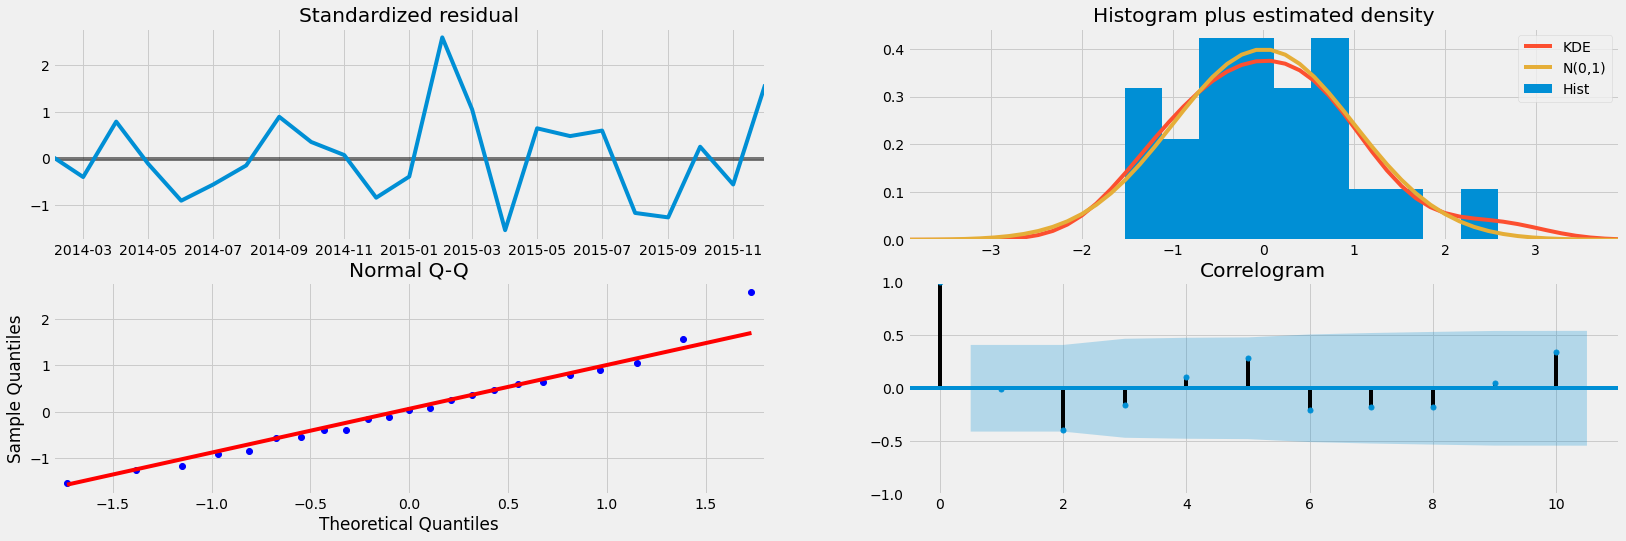

In [36]:
# We see that ARIMA(4, 1, 3)x(1, 1, 2, 12)12 - AIC:610.208 is the best fitted model based on QQ Plot residuals and ACF, and so we use these parameters to 
#fit the ARIMA model for forecasting. 

modelARIMA = myStatsModel.tsa.statespace.SARIMAX(aggregatedData,
                                order = (4,1,3),
                                seasonal_order = (1,1,2,12),
                                enforce_stationarity = True,
                                enforce_invertibility = False)

results = modelARIMA.fit()
print(results.summary())
results.plot_diagnostics(figsize = (25, 8))
plt.show()

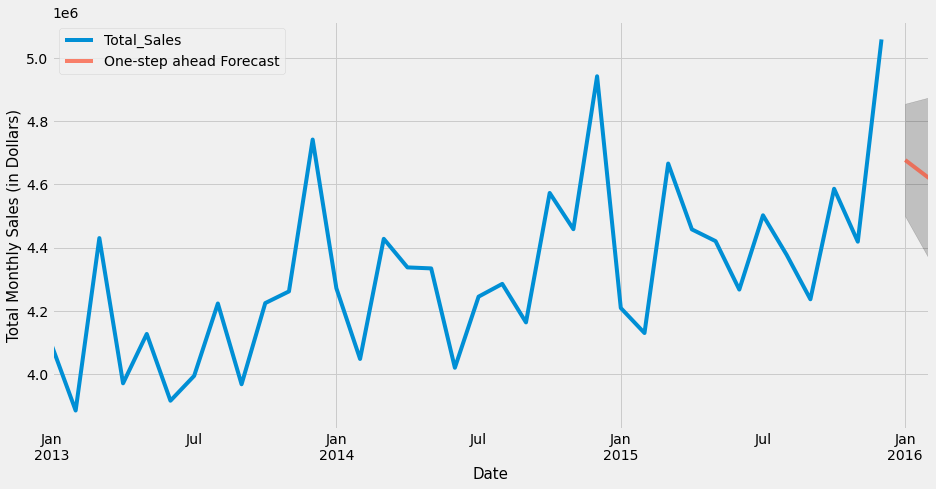

In [37]:
# Now that we've fit our model, let's use it to make predictions.

pred = results.get_prediction(start = pd.to_datetime("2016-01-01"), end = pd.to_datetime("2016-02-01"), dynamic = True)
pred_ci = pred.conf_int()
ax = aggregatedData['2013':].plot(label = "Observed")
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Total Monthly Sales (in Dollars)',fontsize=15)
plt.legend()
plt.show()

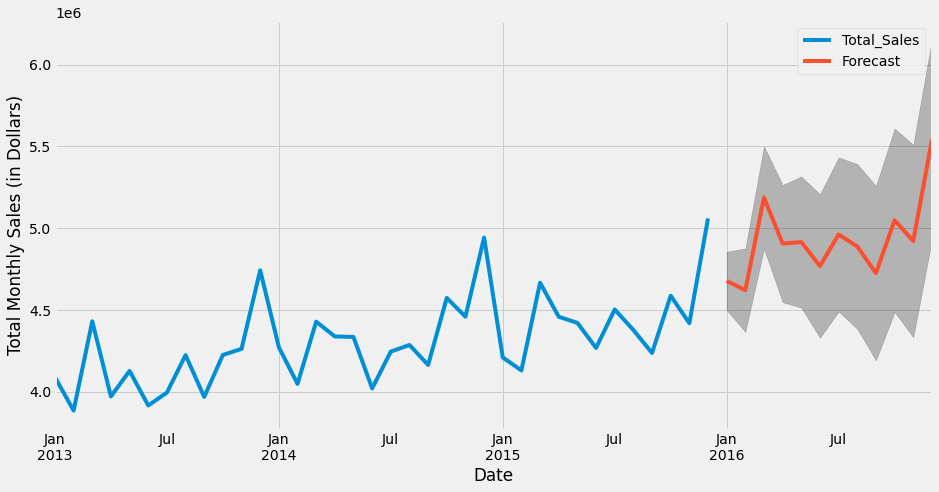

In [38]:
# Use the model to forecast total sales for up to 12 steps ahead in time.
pred_uc = results.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()
ax = aggregatedData.plot(label = "Observed", figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = "Forecast")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = "k", alpha = 0.25)
ax.set_xlabel("Date")
ax.set_ylabel("Total Monthly Sales (in Dollars)")
plt.legend()
plt.show()

In [39]:
print("Predicted Total Sales for each month in Dollars for 2016:")
display(pred_uc.predicted_mean)
print()
print("Error Margins for Predict Sales in Dollars for 2016:")
display(pred_uc.conf_int())


Predicted Total Sales for each month in Dollars for 2016:


2016-01-01   4677160.4804
2016-02-01   4620267.3827
2016-03-01   5187146.6233
2016-04-01   4905055.0634
2016-05-01   4914671.5959
2016-06-01   4767944.3044
2016-07-01   4960904.6266
2016-08-01   4887713.9804
2016-09-01   4724647.3077
2016-10-01   5047862.2340
2016-11-01   4921164.7808
2016-12-01   5540310.1847
Freq: MS, dtype: float64


Error Margins for Predict Sales in Dollars for 2016:


,lower Total_Sales,upper Total_Sales
2016-01-01,4498790.3683,4855530.5925
2016-02-01,4365217.2438,4875317.5217
2016-03-01,4873533.1511,5500760.0955
2016-04-01,4546871.9900,5263238.1368
2016-05-01,4513750.9262,5315592.2655
2016-06-01,4329436.1298,5206452.4790
2016-07-01,4489755.2317,5432054.0216
2016-08-01,4383721.6287,5391706.3321
2016-09-01,4191180.5042,5258114.1111
2016-10-01,4487083.8861,5608640.5818
